In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd

 Linear Regression
 <ul style="margin-left: 30px">
      <li>1.  <a href='#simple~linear~regression'>Simple linear regression </a> </li> <br>
      <li>1.1 <a href='#fitting~reg'> Fitting the regresion line</a> </li><br>
      <li>1.2 <a href='#grad~sim~linear'>Gradient Descent over simple linear regression</a> </li><br>  
      <li>1.3 <a href='#effect~learning~rate'>Effect of different values for learning rate</a> </li><br>
      <li>2.  <a href='#m-linear-r'>Multiple linear regression</a> </li><br> 
      <li><a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li><br>     
      <li><a href='#conclusion'>Conclusion</a> </li><br>  
</ul>    

# Linear regression
<hr>

In statistic,linear regression is a linear approach to modeling the relationship between one or more explanotary variables
(dependent or independent variables). The case of one explonarity variable is called simple linear regression,for more then one is called multiple linear regression.
In linear regression,the relationships are modeled using
<a ahref='https://en.wikipedia.org/wiki/Linear_predictor_function'> linear predictors function </a> whose unknown model parameter are estimated from the data.

<div id='simple~linear~regression'/>

## 1. Simple linear regression
<br>

Simple linear regression is a linear regression model with a single explanotory variable. It concerns two dimensional sample points with one independent variable and one dependent variable(conventionaly, the x and y coordinates in a Catesian coordinate system) and finds a linear function(staight line),as accurately as possible, predicts the dependent variables values as a function of the independent variable.The adjective simple refers to the fact that the outcome variable аs related to a sindle predictor.
<br>


## 1.1  Fitting the regresion line 


Consider the model function $y = \alpha + \beta x$ which describes a line with slope $\beta$ and intercept $\alpha$. <br>
example : let $\alpha=7$ and $\beta=3$, geometrically interpretation of  $y = 7 + 3 x$ looks like that

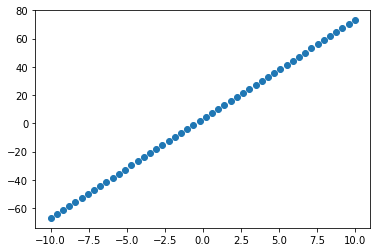

In [2]:
x = np.linspace(-10,10)
y = 7*x + 3
plt.scatter(x,y)

Suppose we observe $n$ data pairs and denote them $(x_i,y_i), i = 1,2,...,n$.

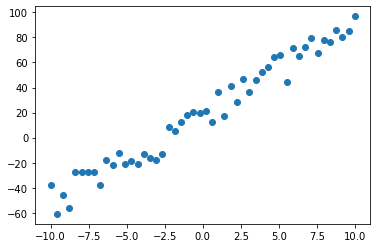

In [3]:
f = lambda x : 7*x + 3 + np.random.uniform(0,30)
y =[f(i) for i in x]
plt.scatter(x,y)    

We can describe the underlying relationship between $y_i$ and $x_i$ invloving this error term $\varepsilon_i$ by <br>
$y_i =  \alpha + \beta x + \varepsilon_i $.The  $\varepsilon_i$  shows the noise of the data.
The goal is to find esitmated values $\alpha$ and $\beta$ wich would provide the best fit in some sence for data points.
In order to find the 'best' fit we will use the <a ahref='https://en.wikipedia.org/wiki/Ordinary_least_squares'>least-squared</a> approach.In the other words our target is to solve the minimization problem respect to $\alpha,\beta$ of function 
$$L = \sum_i(y_i - \alpha - \beta x_i)^2$$.
$L$ is called $Cost$ function the expression $(y_i - \alpha - \beta x_i)^2$ is called $Lost$ function.This function is appropiative because of It is a diferencianal everywhere and gives us  a measure of diference between dependent value $y_i$ and predicted value of $y'(\alpha,\beta)=\alpha + \beta x_i $.<br>
In order to find $min_{\alpha,\beta}L(\alpha,\beta,x_i,_yi)$ we will use Gradient Descent method.<br>

<div id='grad~sim~linear'/>

## 1.2 Gradient Descent over simple linear regression
<hr>

The methods for finding the maximum and minumum (extrema) have been created with developing of mathematical analysis(calculus).Gradient Descent is numerical approach to local minumum of first-oreder differentiable function.The idea is to take repeaded steps on the oposite direction of the gradient the function in current point. 
Let's get the function $f(x)=x^2 $

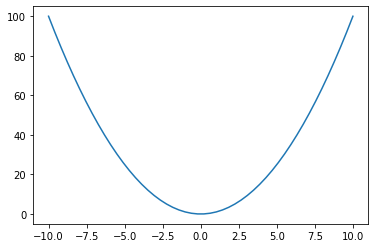

In [4]:
y = x**2
plt.plot(x,y)

Our pupose is to find the value of $x$ where the function gets the minumum value.From fraphic we can look-the answer is x=0.
The GD algorithm is difined by : 
 $$\alpha = \alpha - \nabla_{\alpha}L(\alpha,\beta)*h$$
  $$\beta = \beta - \nabla_{\beta}L(\alpha,\beta)*h$$ <br>
  
where $h$ is called learning rate or step size.
Applying GD algorithm over our lost function we get : <br>
$$\nabla_a(J(a,b)=\frac{\partial{L}}{\partial{a}}=-\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i} $$
$$\nabla_a(J(a,b)=\frac{\partial{L}}{\partial{b}}=- \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)} $$
then for our gradient descent forumula related to simple linear regression we achieved : 
 $$\alpha = \alpha + \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i}*h$$
  $$\beta = \beta +\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)}*h$$ <br>

In [5]:
#implementation cost function
def cost(X,Y,alpha,betta):
    '''
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    Returns :
      number of cost function
  '''
   
    return np.sum((Y - (alpha - betta*X ))**2 )


In [6]:
def gradient_descent(X,Y,C=0.1,E=100):
    '''
    
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a = 30
    b = 1 
    a_args = []
    b_args = []
    n = X.size
  
    for i in range(E):
        a = a + 1/n*(np.sum((Y - a*X - b)*X))*C
        b =  b + 1/n*(np.sum((Y - a*X -b)))*C
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args     

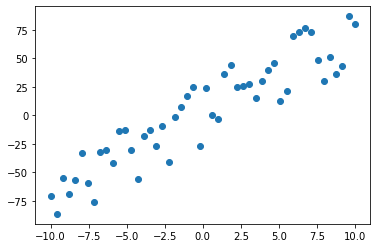

In [7]:
x = np.linspace(-10,10)
f = lambda x : 7*x + 3 + np.random.uniform(-30,30)
y =[f(i) for i in x]
plt.scatter(x,y)


Let to apply gradient descent of above points.

In [8]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.01,E=1000)

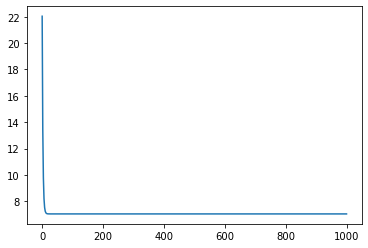

In [9]:
plt.plot(a_r)


(7.049013081284506, 4.213022928196454)

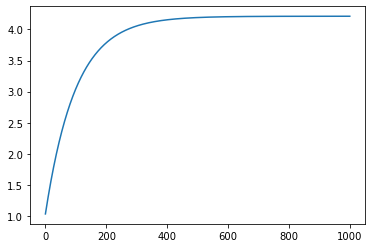

In [10]:
plt.plot(b_r)
a,b

From graphic we can see that the curves tend to  result (7.892385161777225, 5.6459662769234535) which is expected and correct:

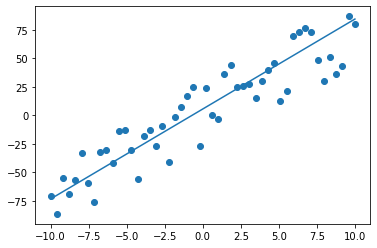

In [11]:
plt.scatter(x,y)  #7.892385161777225, 5.6459662769234535
plt.plot(x,7.89*x + 5.645)

<div id='effect~learning~rate'/>

## 1.3 Effect of different values for learning rate

The Learning rate C is the tunning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of cost function.While the gradient direction is usually determined from the gradient of the cost function, the learning rate determines how big a step is taken in that direction.The too hight learning rate will make  the learning jump  over minima but too low leaning rate will either take too long to converge or get stuck in an undesirable local minimum.In order to achieve faster convergence, prevent oscillations and getting stuck in undesirable local minima the learning rate is often varied during training either in accordance to a learning rate schedule or by using an adaptive learning rate

let's apply different learnning rate to our example:
$C = 0.000001$

(29.21738221742354, 1.0032115572039395)

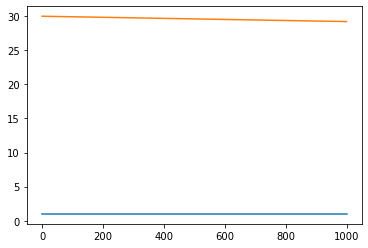

In [12]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.000001,E=1000)
plt.plot(b_r)
plt.plot(a_r)
a,b

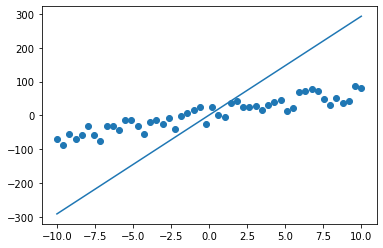

In [13]:
plt.scatter(x,y)  #29.246140805882526, 1.0046438468692425
plt.plot(x,29.2*x + 1.06)

It's too bad, if we increase the number of epoch from 1000 to 100000 the algorithm will be improved but time execution will increase too.

(7.763574016755059, 1.3057729037177819)

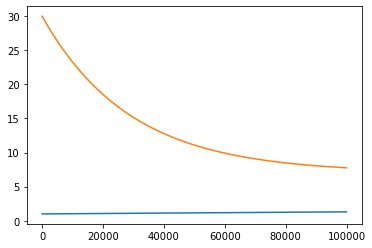

In [14]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.000001,E=100000)
plt.plot(b_r)
plt.plot(a_r)
a,b

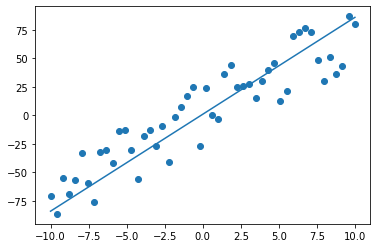

In [15]:
plt.scatter(x,y)  #29.246140805882526, 1.0046438468692425
plt.plot(x,8.5*x + 1.04)

When the data is too big, The decreasing of learning rate can lead to enormous time execution.

if $𝐶=1$ :

(1.305872237120969e+154, -4.21446088845047e+138)

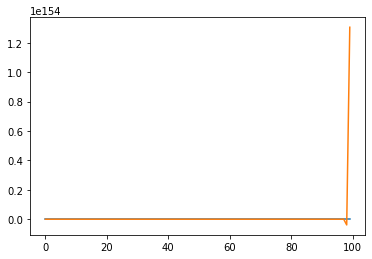

In [16]:
a,b,a_r,b_r = gradient_descent(x,y,C=1,E=100)
plt.plot(b_r)
plt.plot(a_r)
a,b

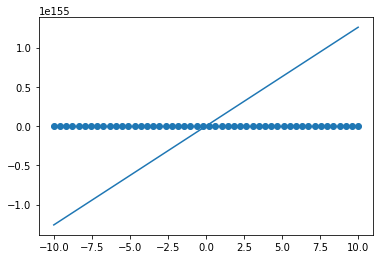

In [17]:
plt.scatter(x,y)  #29.246140805882526, 1.0046438468692425
plt.plot(x,1.2578857958677444e+154*x +-2.785829452071442e+138)

Extremely bad result. In this case, the learning has made a learning jump, therefore the result is avoided from minima.

<div id='m-linear-r'/>

## 2. Multiple linear regression

So far, we have seen the concept of simple linear regression where single variable $X$ was used to model response variable $Y$.
In many applications, there is more then one factor $X$ that influences the response.Multiple linear regressions thus describe how a single variable response depends linearly on a number of predictors variables. 

The multiple linear regression with $k$ different predictor variables $x_1,x_2,..,x_k$ and a response $Y$ can be written as : <br>
$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2  + ... + \beta_k x_k + \varepsilon_i  $$

example : <br> <br>
    $ Y = 10 + 7*x * 15*x_1^2$
This linear model coresponds to surface.    
looks like this :

In [18]:
f = lambda x,y : 10 + 7*x * 15*y
x_1 = np.linspace(-5,5)
y_1 = np.linspace(0,20)
X, Y = np.meshgrid(x, y_1)
Z =  f(X,Y)
X.shape
Y.shape
Z.shape

(50, 50)

Text(0.5, 0.92, '$ Y = 10 + 7*x * 15*x_1^2$')

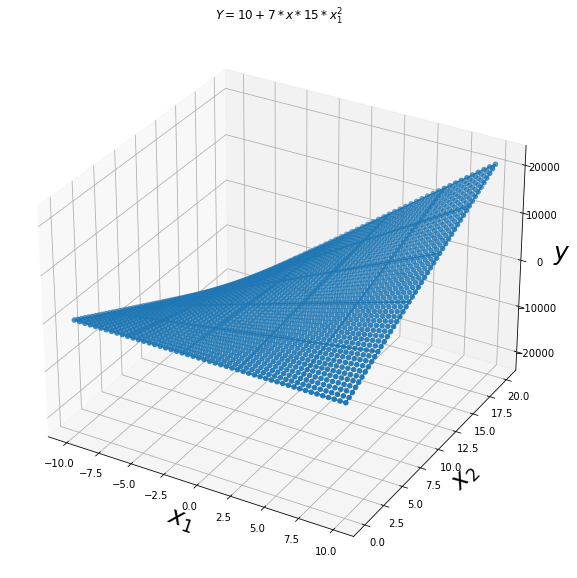

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.scatter(X,Y,Z)
ax.set_xlabel(r'$x_1$',fontsize=25)
ax.set_ylabel(r'$x_2$',fontsize=25)
ax.set_zlabel(r'$y$',fontsize=25)
plt.title(r'$ Y = 10 + 7*x * 15*x_1^2$')

It is a plane in $R^3$ with different slopes in $x_1$ and $x_2$ direction.

If we introduce error term  $𝜀_𝑖$ to our eq. in order to achieve data-'our training data'.

In [20]:
f = lambda x,y : 10 + 7*x * 15*y 
x_1 = np.linspace(-5,5)
x_2 = np.linspace(0,20)
X, Y = np.meshgrid(x_1, x_2)
z = []
for i in range(X.size) :
       z.append(f(x_1[i],y_1[i]))
       


IndexError: index 50 is out of bounds for axis 0 with size 50

In [ ]:
f = lambda x,y :10 + 7*x * 15*y
x_1 = np.linspace(-5,5)
x_2 = np.linspace(-20,20)
X, Y = np.meshgrid(x_1, x_2)
y = f(X,Y)
y.shape
error = np.random.randn(y.shape[0],y.shape[1])
y =y + 1000*error

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y,y)
plt.show()

That is our data generated from $ Y = 10 + 7*x * 15*x_1$ with noise.Our purpose is as we've seen before from this data with noise to find the best fiting parameter.

In [ ]:
X_1 = X.flatten()
Y_1 = Y.flatten()
z = y.flatten()
data = np.array([X_1,Y_1,z]).T


In [ ]:
Y_data.shape

In [ ]:
X_data.shape
df = pd.DataFrame(data,columns=['x_1','x_2','y'])

In [ ]:
df

# 2.1 Polynomial regresion 

Polynomial regression is a regression algorithm that models the realationship between independent variable $X$ and dependent variable $Y$ as $n^{th}$ degree  <a ahef='https://en.wikipedia.org/wiki/Polynomial' > polynom </a> . 

## References
1.http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf